In [1]:
import pandas as pd
import FinanceDataReader as fdr


In [2]:
df_kos = fdr.StockListing('KOSPI')

In [6]:
df_kos[['Marcap','Stocks']].describe()

,Marcap,Stocks
count,9.430000e+02,9.430000e+02
mean,2.047251e+12,6.717417e+07
std,1.361091e+13,2.237794e+08
min,3.348480e+09,1.098520e+05
25%,8.978561e+10,1.041226e+07
50%,2.289801e+11,2.719508e+07
75%,7.223603e+11,6.130395e+07
max,3.707235e+14,5.969783e+09


In [7]:
kos_list=df_kos[(df_kos['Marcap'] ==0) | (df_kos['Marcap'] <= 8.978561e+10) |(df_kos['Stocks'] <= 1.041226e+07)] .index
df_kos.drop(kos_list,axis='index',inplace=True)
df_kos

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,62100,1,1000,1.64,61700,62500,61500,8787723,544647080100,370723496355000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,509000,1,1000,0.20,511000,515000,504000,127679,65027586000,119106000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,92500,1,3400,3.82,90000,93700,89600,2767925,254107634100,67340218762500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,789000,1,1000,0.13,790000,794000,785000,21722,17160792000,56156286000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,672000,1,6000,0.90,666000,677000,659000,87211,58265051000,47438054496000,70592343,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,025750,KR7025750001,한솔홈데코,KOSPI,,1136,3,0,0.00,1136,1142,1121,165585,187525196,91522009264,80565149,STK
701,004840,KR7004840005,DRB동일,KOSPI,,4545,1,25,0.55,4520,4585,4520,17522,79851900,90581850000,19930000,STK
702,000910,KR7000910000,유니온,KOSPI,,5790,2,-240,-3.98,5920,5920,5750,660325,3849684740,90391274010,15611619,STK
705,446070,KR7446070005,유니드비티플러스,KOSPI,,8490,2,-170,-1.96,8650,8780,8270,239488,2018037900,90089215350,10611215,STK


In [8]:
df_kos_code=df_kos['Code'].to_frame()


In [9]:
import pandas as pd
def make_code(x):
    x = str(x)
    return '0'*(6-len(x)) + x

KR = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download',header=0)[0]
KR['Code'] = KR['종목코드'].apply(make_code)
KR_list_1 = KR[KR['상장일'] < '2000-01-01']['Code'].to_frame()
KR_list_2 = KR[(KR['상장일'] >= '2000-01-01') & (KR['상장일'] < '2007-01-01')]['Code'].to_frame()
KR_list_3 = KR[(KR['상장일'] >= '2007-01-01') & (KR['상장일'] < '2015-06-15')]['Code'].to_frame()
KR_list_4 = KR[KR['상장일'] >= '2015-06-15']['Code'].to_frame()


In [10]:
df_kr_1 = pd.concat([df_kos_code,KR_list_1])
df_kr_2 = pd.concat([df_kos_code,KR_list_2])
df_kr_3 = pd.concat([df_kos_code,KR_list_3])
df_kr_4 = pd.concat([df_kos_code,KR_list_4])


In [11]:
df_kr1=df_kr_1[df_kr_1.duplicated()]
df_kr2=df_kr_2[df_kr_2.duplicated()]
df_kr3=df_kr_3[df_kr_3.duplicated()]
df_kr4=df_kr_4[df_kr_4.duplicated()]

In [14]:
df_kr0 = pd.concat([df_kr1,df_kr2,df_kr3,df_kr4])
df_kr0

,Code
0,004840
4,001390
13,010060
15,005490
18,011810
...,...
2285,350520
2291,271940
2292,226320
2294,089590


In [92]:
kr1 =[]
kr2=[]
kr3=[]
kr4=[]

In [93]:
from tqdm import tqdm
import time


for i in range(len(df_kr1)):
    df=pd.DataFrame
    kr1.append(df)

for i in range(len(df_kr2)):
    df=pd.DataFrame
    kr2.append(df) 

for i in range(len(df_kr3)):
    df=pd.DataFrame
    kr3.append(df)  

for i in range(len(df_kr4)):
    df=pd.DataFrame
    kr4.append(df)     


In [104]:
for i in range(len(df_kr1)):
    kr1[i] = fdr.DataReader(df_kr1.iat[i,0],'1980')
    kr1[i]['Code'] =df_kr1.iat[i,0]


ValueError: Columns must be same length as key

In [94]:
for i in range(len(df_kr1)):
    kr1[i] = fdr.DataReader(df_kr1.iat[i,0],'1980')
    kr1[i]['Code'] =df_kr1.iat[i,0]


for i in range(len(df_kr2)):
    kr2[i] = fdr.DataReader(df_kr2.iat[i,0],'2000')
    kr2[i]['Code'] =df_kr2.iat[i,0]

for i in range(len(df_kr3)):
    kr3[i] = fdr.DataReader(df_kr3.iat[i,0],'2007')
    kr3[i]['Code'] =df_kr3.iat[i,0]
    
for i in range(len(df_kr4)):
    kr4[i] = fdr.DataReader(df_kr4.iat[i,0],'2015-6-15')
    kr4[i]['Code'] =df_kr4.iat[i,0]


In [109]:
kr1 = pd.DataFrame(kr1)

,Open,High,Low,Close,Volume,Change,Code
Date,,,,,,,
1998-11-12,598,609,582,604,18000,NaN,004840
1998-11-13,611,611,582,590,27000,-0.023179,004840
1998-11-14,586,586,583,590,4100,0.000000,004840
1998-11-16,612,612,593,596,5900,0.010169,004840
1998-11-17,592,609,592,598,21700,0.003356,004840
...,...,...,...,...,...,...,...
2023-02-17,4345,4420,4345,4420,4174,0.017261,004840
2023-02-20,4420,4500,4305,4410,7467,-0.002262,004840
2023-02-21,4490,4490,4355,4430,9106,0.004535,004840


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

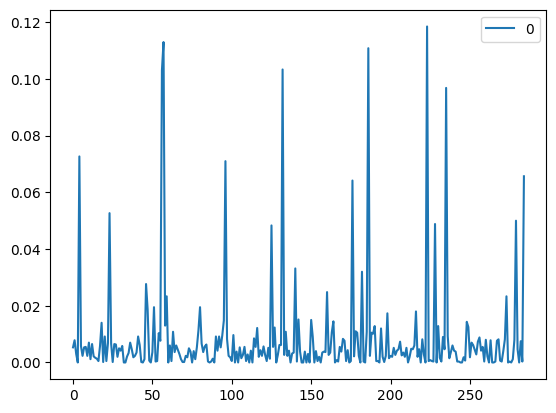

In [82]:
kr1_ft_V =[]
for i in range(len(df_kr1)):
    kr1_ft_V.append((len(kr1[i][kr1[i]['Volume']==0])/len(kr1[i])))
kr1_ft_V=pd.DataFrame(kr1_ft_V)
kr1_ft_V.plot()

In [ ]:
kr1_ft_TB =[]
for i in range(len(df_kr1)):
    kr1_ft_V.append((len(kr1[i][kr1[i]['Volume']==0])/len(kr1[i])))

In [126]:
for i in range(len(df_kr1)):
    len(kr1.loc[0,0].loc[:'2015-6-15'][(kr1.loc[0,0].loc[:'2015-6-15']['Change']>=0.07)|(kr1.loc[0,0].loc[:'2015-6-15']['Change']<=-0.07)])/len(kr1.loc[0,0].loc[:'2015-6-15'])

0.05115712545676005

In [85]:
kr1.drop(index = kr1_ft_V[kr1_ft_V[0]>= 0.04].index)

[            Open  High   Low  Close  Volume    Change    Code
 Date                                                         
 1998-11-12   598   609   582    604   18000       NaN  004840
 1998-11-13   611   611   582    590   27000 -0.023179  004840
 1998-11-14   586   586   583    590    4100  0.000000  004840
 1998-11-16   612   612   593    596    5900  0.010169  004840
 1998-11-17   592   609   592    598   21700  0.003356  004840
 ...          ...   ...   ...    ...     ...       ...     ...
 2023-02-17  4345  4420  4345   4420    4174  0.017261  004840
 2023-02-20  4420  4500  4305   4410    7467 -0.002262  004840
 2023-02-21  4490  4490  4355   4430    9106  0.004535  004840
 2023-02-22  4645  4850  4505   4520  255333  0.020316  004840
 2023-02-23  4520  4585  4520   4535   20886  0.003319  004840
 
 [6000 rows x 7 columns],
              Open   High    Low  Close  Volume    Change    Code
 Date                                                            
 1998-11-12  26265  2

In [110]:
kr1.drop(index = kr1_ft_V[kr1_ft_V[0]>= 0.04].index)

,0
0,Open High Low Close Volume ...
1,Open High Low Close Volume...
2,Open High Low Close Volume...
3,Open High Low Close V...
5,Open High Low Close Volume...
...,...
278,Open High Low Close Volume ...
280,Open High Low Close Volume ...
281,Open High Low Close Volume...
282,Open High Low Close Vo...


In [ ]:
kr1_ft_TD =[]
for i in range(len(df_kr1)):
    kr1_ft_V.append((len(kr1[i][kr1[i]['Volume']==0])/len(kr1[i])))
kr1_ft_V=pd.DataFrame(kr1_ft_V)
kr1_ft_V.plot()

47

In [38]:
for i in range(df_kr1):
    kr1[i]['Volume'].count(0)

,Open,High,Low,Close,Volume,Change,Code
Date,,,,,,,
2023-02-17,24150,25050,23950,24600,104323,0.004082,001390
2023-02-20,24750,25700,24600,25400,207490,0.032520,001390
2023-02-21,25650,25700,24450,24700,186918,-0.027559,001390
2023-02-22,24350,24350,23400,23500,161668,-0.048583,001390
2023-02-23,23900,24200,23400,24000,71205,0.021277,001390


In [37]:
kr4[1].loc['2021-05-27':'2023-02-23',:]

,Open,High,Low,Close,Volume,Change,Code
Date,,,,,,,
2021-05-27,12650,14300,12000,12000,11609074,NaN,383800
2021-05-28,12300,13000,12150,12250,4033208,0.020833,383800
2021-05-31,12100,12150,10950,10950,4843811,-0.106122,383800
2021-06-01,11000,11300,10900,11000,1879288,0.004566,383800
2021-06-02,10700,10850,10600,10700,2426922,-0.027273,383800
...,...,...,...,...,...,...,...
2023-02-17,8440,8470,8400,8420,86503,-0.003550,383800
2023-02-20,8420,8470,8400,8450,82136,0.003563,383800
2023-02-21,8440,8510,8440,8510,104101,0.007101,383800


In [ ]:
xs=[]
ys=[]
for i in range(9):
    X = dfxs[i].values.tolist()
    y = dfys[i].values.tolist()
    xs.append(X)
    ys.append(y)


In [ ]:
window_size = 10

Xx = []
Yy =[] 
 
for i in range(9):
    linex = [] 
    liney = []
    X=xs[i]
    Y=ys[i]
    b=len(ys[i])
    for j in range(b-window_size):
         
        _X = X[j : j + window_size] 
        _y = Y[j + window_size]   
        linex.append(_X)
        liney.append(_y)  
    
    Xx.append(linex)
    Yy.append(liney)
Yy

In [ ]:
train_X=[]
train_y=[]
test_X=[]
test_y=[]

for i in range(len(list_kr_0)):
    train_size = int(len(Yy[i]) * 0.7)
    train_X.append(np.array(Xx[i][0 : train_size]))
    train_y.append(np.array(Yy[i][0 : train_size]))
    test_size = len(Xx[i]) - train_size
    test_X.append(np.array(Xx[i][train_size : len(Xx[i])]))
    test_y.append(np.array(Yy[i][train_size : len(Yy[i])]))
train_y